In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import os
import cvxpy as cp

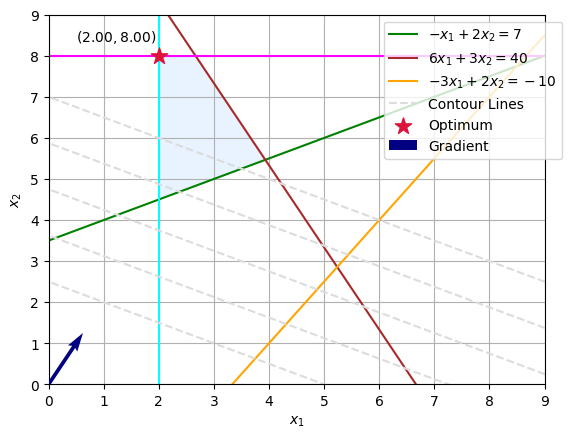

In [23]:
feasible = [(8/3,8), (2,8), (59/15,82/15), (2,4.5)]
hull = ConvexHull(feasible)
hull_points = np.array(feasible)[hull.vertices]
plt.fill(hull_points[:, 0], hull_points[:, 1], color='dodgerblue', alpha=0.1)
feasible.remove((2, 8))
x = np.linspace(-2000, 16, 2000)
y1 = 0.5*x+3.5
y2 = -2*x+40/3 
y3 = 3/2*x-5


# plot constraints

plt.plot(x, y1, color = 'green', label = '$-x_1 + 2x_2 = 7$')
plt.plot(x, y2, color = 'brown', label = '$6x_1 + 3x_2 = 40$')
plt.plot(x, y3, color = 'orange', label = '$-3x_1 + 2x_2 = -10$')
plt.axhline(y=8, color = 'magenta')
plt.axvline(x=2, color = 'cyan')
#contour lines
c1 = -0.5*x + 2.5
c2 = -0.5*x + 3.625
c3 = -0.5*x + 4.75
c4 = -0.5*x + 5.875
c5 = -0.5*x + 7

plt.plot(x, c1, color = 'gainsboro', linestyle = 'dashed', label = 'Contour Lines')
plt.plot(x, c2, color = 'gainsboro', linestyle = 'dashed')
plt.plot(x, c3, color = 'gainsboro', linestyle = 'dashed')
plt.plot(x, c4, color = 'gainsboro', linestyle = 'dashed')
plt.plot(x, c5, color = 'gainsboro', linestyle = 'dashed')

plt.scatter(2, 8, color='crimson', s=150, marker='*', zorder=2, label='Optimum')
plt.text(0.5, 8 + 0.35, f'$({2:.2f}, {8:.2f})$', color='black', zorder=2, fontsize=10)

plt.quiver(
            0, 0,
            1, 2,
            angles='xy', scale_units='xy', scale=1.6, color='navy', label='Gradient', zorder=3
            )

plt.xlim(0,9)
plt.ylim(0,9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
os.makedirs('plots', exist_ok=True)
plt.savefig('plots/hw1_q3.pgf')
plt.show()


In [20]:
x1 = cp.Variable() 
x2 = cp.Variable() 
t = cp.Variable() 
s = cp.Variable() 
objective = cp.Minimize(2*t + 5*s) 
constraints = [x1 >= 7,
                x2 <=-13,
                t >=-x1,
                t >= x1, 
                s >= 3*x1 + x2, 
                s >= 2] 
prob = cp.Problem(objective, constraints) 
prob.solve(solver=cp.GUROBI) 
print("status:", prob.status)
print(f"Optimal solution: ({x1.value}, {x2.value})")
print("Optimal value", prob.value)

status: optimal
Optimal solution: (7.0, -19.0)
Optimal value 24.0


In [6]:
x = cp.Variable(2) 
y = cp.Variable(2, integer = True)

objective = cp.Maximize(x[0] + 2*x[1]) 
constraints = [-3*x[0] + 2*x[1] >=-10,
               -x[0] + 2*x[1] >= 7,
                6*x[0] + 3*x[1] <= 40,
                x[0] >= 2, x[1] <= 8,
                x[0] == y[0], x[1] == y[1]]
prob = cp.Problem(objective, constraints) 
sol = prob.solve() 
print("Optimal value", sol)
print("Optimal var")
print(x.value)

Optimal value 18.0
Optimal var
[2. 8.]


In [5]:
import cvxpy as cp

y1 = cp.Variable(1, nonpos = True)
y2 = cp.Variable(1, nonpos = True)
y3 = cp.Variable(1, nonpos = True)
y4 = cp.Variable(1, nonpos = True)
y5 = cp.Variable(1, nonpos = True)
y6 = cp.Variable(1, nonpos = True)
y7 = cp.Variable(1)

objective = cp.Maximize(y7)
constraints = [-y1 + y5 - y6 + y7 == 0,
               y2 + 2*y5 - 2*y6 + y7 == 0,
               y3 + 3*y5 - 3*y6 + y7 == 0,
               y4 + 4*y5 - 4*y6 + y7 == 0,
               -y1 - y2 - y3 - y4 == 1,
               -y5 - y6 == 1]

prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var: ({y1.value}, {y2.value}, {y3.value}, {y4.value}, {y5.value}, {y6.value}, {y7.value})")


status: optimal
optimal value -0.16666666488879045
optimal var: ([0.], [-0.16666667], [-0.33333333], [-0.5], [-0.41666667], [-0.58333333], [-0.16666666])


In [ ]:
import numpy as np
x = cp.Variable(6)

objective = cp.Minimize(cp.exp(x[4] + x[5]))

constraints = [x[4] >= -x[0],
               x[4] >= x[1],
               x[4] >= x[2],
               x[4] >= x[3],
               x[5] >= x[0] + 2*x[1] + 3*x[2] + 4*x[3],
                x[5] >= -x[0] - 2*x[1] - 3*x[2] - 4*x[3],
                x[0] + x[1] + x[2] + x[3] == 1]

prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value-np.exp(-1/6))
print("optimal var", x.value)

status: optimal
optimal value 0.0
optimal var [ 1.50000001e+00 -1.66666697e-01 -1.66666665e-01 -1.66666656e-01
 -1.66666647e-01  9.61801234e-10]
